In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn import tree , metrics, preprocessing


In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [3]:
os.chdir("E:\\Python\\Data Analytics\\data")

In [4]:
commos_data=pd.read_sas('commsdata.sas7bdat', encoding='latin-1')

In [5]:
commos_data.shape

(56557, 128)

In [6]:
commos_data.head()

,Customer_ID,upsell_xsell,churn,lifetime_value,avg_arpu_3m,acct_age,billing_cycle,nbr_contracts_ltd,credit_class,sales_channel,...,pymts_late_ltd,calls_care_ltd,MB_Data_Usg_M04,MB_Data_Usg_M05,MB_Data_Usg_M06,MB_Data_Usg_M07,MB_Data_Usg_M08,MB_Data_Usg_M09,seconds_of_data_norm,seconds_of_data_log
0,471.0,0.0,0.0,1693.8,44.980000,55.000000,4.0,7.0,prime,Indirect,...,5.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,4.110874
1,1057.0,0.0,0.0,38682.5,44.989330,47.000000,3.0,5.0,prime,Indirect,...,5.0,115.0,0.0,0.0,0.0,0.0,330.0,646.0,48300.0,10.785208
2,1177.0,0.0,0.0,5526.4,51.775434,46.176471,7.0,4.8,prime,Retail,...,5.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,14700.0,9.595671
3,1181.0,0.0,0.0,505.6,51.775434,75.000000,7.0,4.8,prime,Retail,...,5.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1185.0,0.0,1.0,9143.2,83.320000,50.000000,5.0,3.0,prime,Indirect,...,5.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,15840.0,9.670357


In [7]:
list(commos_data)

['Customer_ID',
 'upsell_xsell',
 'churn',
 'lifetime_value',
 'avg_arpu_3m',
 'acct_age',
 'billing_cycle',
 'nbr_contracts_ltd',
 'credit_class',
 'sales_channel',
 'rfm_score',
 'Est_HH_Income',
 'region',
 'state',
 'city',
 'zipcode_primary',
 'region_lat',
 'region_long',
 'state_lat',
 'state_long',
 'city_lat',
 'city_long',
 'zip_lat',
 'zip_long',
 'cs_med_home_value',
 'cs_pct_home_owner',
 'cs_ttl_pop',
 'cs_hispanic',
 'cs_caucasian',
 'cs_afr_amer',
 'cs_other',
 'cs_ttl_urban',
 'cs_ttl_rural',
 'cs_ttl_male',
 'cs_ttl_female',
 'cs_ttl_hhlds',
 'cs_ttl_mdage',
 'forecast_region',
 'product_plan_desc',
 'mb_inclplan',
 'ever_days_over_plan',
 'ever_times_over_plan',
 'handset_age_grp',
 'handset',
 'lifestage',
 'rp_pooled_ind',
 'data_device_age',
 'equip_age',
 'mfg_apple',
 'mfg_samsung',
 'mfg_htc',
 'mfg_motorola',
 'mfg_lg',
 'mfg_nokia',
 'delinq_indicator',
 'times_delinq',
 'count_of_suspensions_6m',
 'avg_days_susp',
 'calls_total',
 'calls_in_pk',
 'calls_in_o

In [8]:
df=commos_data[['churn','MB_Data_Usg_M04','MB_Data_Usg_M07','avg_arpu_3m','acct_age','avg_data_chrgs_3m', 'mb_data_usg_m03','calls_TS_acct', 'calls_in_offpk','calls_in_pk', 'count_of_suspensions_6m', 'credit_class','data_usage_amt','ever_days_over_plan','ever_times_over_plan','lifetime_value','mb_data_usg_m02','mou_onnet_6m_normal','mou_onnet_pct_MOM','mou_total_pct_MOM','res_calls_3mavg_acct','res_calls_6mavg_acct', 'times_delinq','tot_mb_data_curr','tot_mb_data_roam_curr','tot_overage_chgs','tot_voice_chrgs_curr','voice_tot_bill_mou_curr']]

In [9]:
df.head(10)

,churn,MB_Data_Usg_M04,MB_Data_Usg_M07,avg_arpu_3m,acct_age,avg_data_chrgs_3m,mb_data_usg_m03,calls_TS_acct,calls_in_offpk,calls_in_pk,...,mou_onnet_pct_MOM,mou_total_pct_MOM,res_calls_3mavg_acct,res_calls_6mavg_acct,times_delinq,tot_mb_data_curr,tot_mb_data_roam_curr,tot_overage_chgs,tot_voice_chrgs_curr,voice_tot_bill_mou_curr
0,0.0,0.0,0.0,44.980000,55.000000,0.000000,1972.923588,2.0,236.346667,126.000000,...,-0.359859,-0.008977,0.000000,0.000000,1.0,552.476771,0.0,0.000000,39.990000,2184.012768
1,0.0,0.0,0.0,44.989330,47.000000,24.993330,3640.361179,0.0,1338.943333,809.333333,...,-0.493587,-0.187233,0.000000,0.000000,1.0,6165.542121,0.0,19.900000,15.996000,34880.150043
2,0.0,0.0,0.0,51.775434,46.176471,8.321470,1763.400476,6.0,402.116667,212.666667,...,-0.730719,0.044034,0.000000,0.000000,1.0,1762.668283,0.0,1.103353,29.301982,5125.863130
3,0.0,0.0,0.0,51.775434,75.000000,8.321470,1094.372448,3.0,7.566667,1.000000,...,-1.000000,-1.000000,0.000000,0.000000,1.0,1184.412701,0.0,1.103353,29.301982,53.515804
4,1.0,0.0,0.0,83.320000,50.000000,23.330000,4202.733267,5.0,1585.286667,1198.666667,...,-0.795729,-0.510098,0.000000,0.000000,1.0,3143.648157,0.0,0.000000,49.990000,37070.996149
5,1.0,0.0,0.0,62.806660,56.000000,7.826666,2152.936531,4.0,594.090000,238.000000,...,-0.148972,2.072115,0.000000,0.000000,1.0,2055.024175,0.0,0.000000,39.990000,11445.793120
6,0.0,0.0,0.0,79.615000,64.000000,40.640000,2128.927274,1.0,624.686667,547.666667,...,-0.671083,-0.099541,0.898477,0.494359,0.0,2096.479654,0.0,0.000000,38.985000,10663.855136
7,0.0,0.0,0.0,66.643330,45.000000,0.300000,3351.043488,0.0,1408.733333,852.666667,...,-0.728924,-0.027257,0.000000,0.000000,1.0,3421.024279,0.0,0.000000,29.993330,21028.493520
8,0.0,0.0,604.0,51.775434,46.176471,8.321470,2903.959444,17.0,755.473333,226.000000,...,-0.571054,-0.057198,0.000000,0.000000,1.0,2230.001352,0.0,1.103353,29.301982,4101.241679
9,0.0,0.0,0.0,71.083330,54.000000,9.776666,2499.364553,13.0,986.400000,780.666667,...,-0.645906,0.203727,0.000000,0.000000,1.0,1997.546250,0.0,0.000000,44.990000,7490.420915


In [10]:
df.shape

(56557, 28)

In [11]:
df.isnull().sum()

churn                          0
MB_Data_Usg_M04                0
MB_Data_Usg_M07                0
avg_arpu_3m                 1120
acct_age                       0
avg_data_chrgs_3m           1120
mb_data_usg_m03                0
calls_TS_acct                  0
calls_in_offpk                 0
calls_in_pk                    0
count_of_suspensions_6m        0
credit_class                   0
data_usage_amt                 0
ever_days_over_plan            0
ever_times_over_plan           0
lifetime_value                 0
mb_data_usg_m02                0
mou_onnet_6m_normal        21352
mou_onnet_pct_MOM          26745
mou_total_pct_MOM           9104
res_calls_3mavg_acct           0
res_calls_6mavg_acct           0
times_delinq                   0
tot_mb_data_curr               0
tot_mb_data_roam_curr          0
tot_overage_chgs            1120
tot_voice_chrgs_curr        1120
voice_tot_bill_mou_curr        0
dtype: int64

In [12]:
df1=df.dropna(axis=1)

In [13]:
df=df.dropna()

In [14]:
df=df.dropna()

In [15]:
df.isnull().sum()

churn                      0
MB_Data_Usg_M04            0
MB_Data_Usg_M07            0
avg_arpu_3m                0
acct_age                   0
avg_data_chrgs_3m          0
mb_data_usg_m03            0
calls_TS_acct              0
calls_in_offpk             0
calls_in_pk                0
count_of_suspensions_6m    0
credit_class               0
data_usage_amt             0
ever_days_over_plan        0
ever_times_over_plan       0
lifetime_value             0
mb_data_usg_m02            0
mou_onnet_6m_normal        0
mou_onnet_pct_MOM          0
mou_total_pct_MOM          0
res_calls_3mavg_acct       0
res_calls_6mavg_acct       0
times_delinq               0
tot_mb_data_curr           0
tot_mb_data_roam_curr      0
tot_overage_chgs           0
tot_voice_chrgs_curr       0
voice_tot_bill_mou_curr    0
dtype: int64

In [16]:
df.shape

(26900, 28)

In [17]:
df1.shape

(56557, 21)

####  Droping the  coloumns conating Nan values could lead to loss of information as important variable such as arpu(average recharge of three months). hence obseravtions containing Nan values were dropped by dropping the rows conatining them

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26900 entries, 0 to 56554
Data columns (total 28 columns):
churn                      26900 non-null float64
MB_Data_Usg_M04            26900 non-null float64
MB_Data_Usg_M07            26900 non-null float64
avg_arpu_3m                26900 non-null float64
acct_age                   26900 non-null float64
avg_data_chrgs_3m          26900 non-null float64
mb_data_usg_m03            26900 non-null float64
calls_TS_acct              26900 non-null float64
calls_in_offpk             26900 non-null float64
calls_in_pk                26900 non-null float64
count_of_suspensions_6m    26900 non-null float64
credit_class               26900 non-null object
data_usage_amt             26900 non-null float64
ever_days_over_plan        26900 non-null float64
ever_times_over_plan       26900 non-null float64
lifetime_value             26900 non-null float64
mb_data_usg_m02            26900 non-null float64
mou_onnet_6m_normal        26900 non-null 

In [19]:
df.head()

,churn,MB_Data_Usg_M04,MB_Data_Usg_M07,avg_arpu_3m,acct_age,avg_data_chrgs_3m,mb_data_usg_m03,calls_TS_acct,calls_in_offpk,calls_in_pk,...,mou_onnet_pct_MOM,mou_total_pct_MOM,res_calls_3mavg_acct,res_calls_6mavg_acct,times_delinq,tot_mb_data_curr,tot_mb_data_roam_curr,tot_overage_chgs,tot_voice_chrgs_curr,voice_tot_bill_mou_curr
0,0.0,0.0,0.0,44.980000,55.000000,0.00000,1972.923588,2.0,236.346667,126.000000,...,-0.359859,-0.008977,0.0,0.0,1.0,552.476771,0.0,0.000000,39.990000,2184.012768
1,0.0,0.0,0.0,44.989330,47.000000,24.99333,3640.361179,0.0,1338.943333,809.333333,...,-0.493587,-0.187233,0.0,0.0,1.0,6165.542121,0.0,19.900000,15.996000,34880.150043
2,0.0,0.0,0.0,51.775434,46.176471,8.32147,1763.400476,6.0,402.116667,212.666667,...,-0.730719,0.044034,0.0,0.0,1.0,1762.668283,0.0,1.103353,29.301982,5125.863130
3,0.0,0.0,0.0,51.775434,75.000000,8.32147,1094.372448,3.0,7.566667,1.000000,...,-1.000000,-1.000000,0.0,0.0,1.0,1184.412701,0.0,1.103353,29.301982,53.515804
4,1.0,0.0,0.0,83.320000,50.000000,23.33000,4202.733267,5.0,1585.286667,1198.666667,...,-0.795729,-0.510098,0.0,0.0,1.0,3143.648157,0.0,0.000000,49.990000,37070.996149


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
churn,26900.0,0.079703,0.270837,0.000000,0.000000,0.000000,0.000000,1.000000
MB_Data_Usg_M04,26900.0,120.387175,231.125193,0.000000,2.000000,57.000000,163.000000,14606.000000
MB_Data_Usg_M07,26900.0,93.973903,170.719256,0.000000,3.000000,39.000000,123.000000,13672.000000
avg_arpu_3m,26900.0,60.311599,22.940124,0.000000,49.990000,54.990000,73.375830,160.376185
acct_age,26900.0,45.319939,12.902449,18.000000,37.000000,46.176471,52.000000,139.000000
avg_data_chrgs_3m,26900.0,11.752392,13.932273,0.000000,0.200000,8.321470,19.990000,78.600570
mb_data_usg_m03,26900.0,1447.554081,1349.750886,-1621.000000,439.337515,1232.183361,2085.122909,40784.234266
calls_TS_acct,26900.0,5.229963,5.381492,0.000000,1.000000,4.000000,8.000000,80.000000
calls_in_offpk,26900.0,268.844564,279.015579,-497.670000,80.680000,214.790000,415.342500,4640.243333
calls_in_pk,26900.0,174.987546,181.961919,-397.000000,57.000000,146.000000,264.000000,3487.333333


In [21]:
df['times_delinq'].value_counts()

0.0    18112
1.0     6252
2.0     2029
3.0      460
4.0       44
5.0        2
6.0        1
Name: times_delinq, dtype: int64

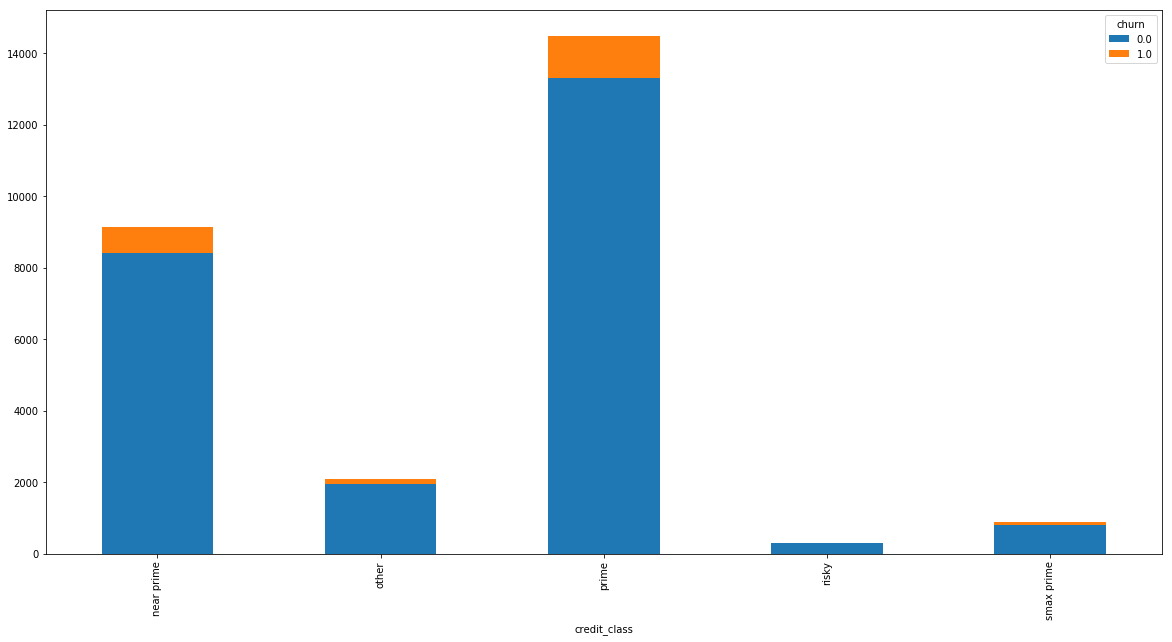

In [22]:
df.groupby(["credit_class","churn"]).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))

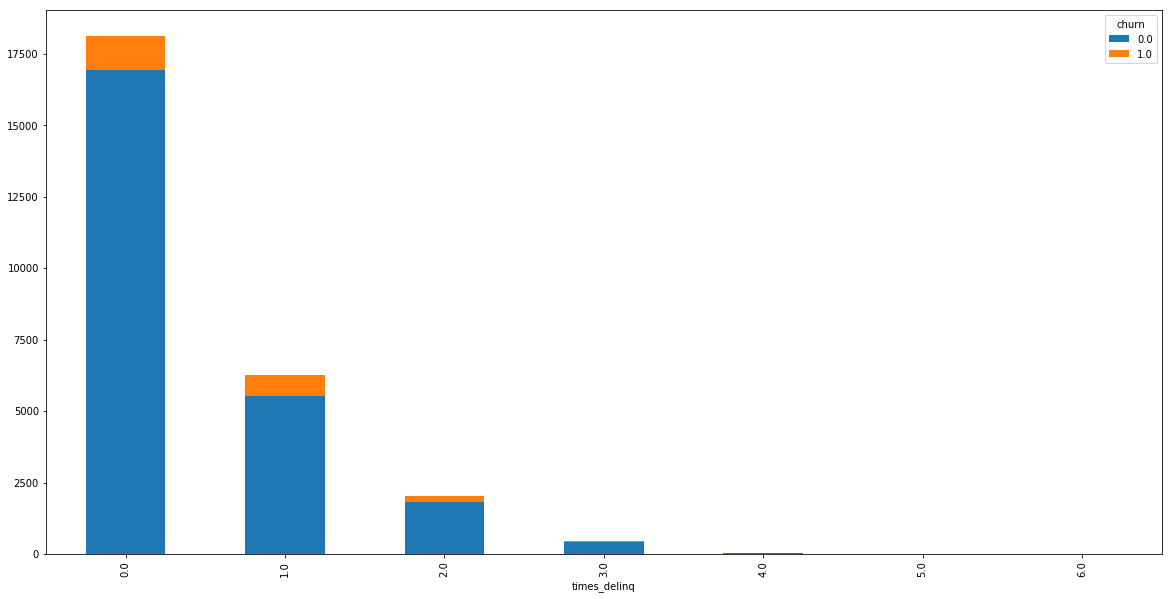

In [23]:
df.groupby(["times_delinq","churn"]).size().unstack().plot(kind='bar',stacked=True, figsize=(20,10))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


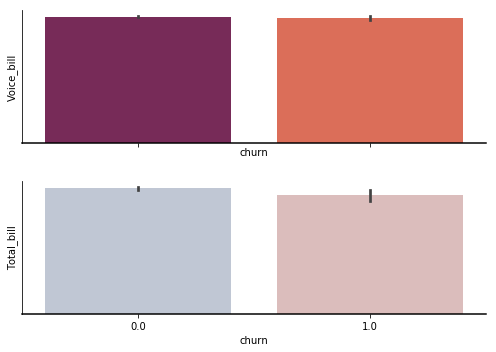

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

sns.barplot(x=df['churn'], y=df['tot_voice_chrgs_curr'], palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Voice_bill")

sns.barplot(x=df['churn'], y=df['voice_tot_bill_mou_curr'], palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Total_bill")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
df.shape

(26900, 31)

In [27]:
y=df['churn']

In [28]:
y.value_counts()

0.0    24756
1.0     2144
Name: churn, dtype: int64

In [29]:
x=df.drop("churn", axis=1)

In [30]:
x.head()

,MB_Data_Usg_M04,MB_Data_Usg_M07,avg_arpu_3m,acct_age,avg_data_chrgs_3m,mb_data_usg_m03,calls_TS_acct,calls_in_offpk,calls_in_pk,count_of_suspensions_6m,...,times_delinq,tot_mb_data_curr,tot_mb_data_roam_curr,tot_overage_chgs,tot_voice_chrgs_curr,voice_tot_bill_mou_curr,credit_class_other,credit_class_prime,credit_class_risky,credit_class_smax prime
0,0.0,0.0,44.980000,55.000000,0.00000,1972.923588,2.0,236.346667,126.000000,0.000000,...,1.0,552.476771,0.0,0.000000,39.990000,2184.012768,0,1,0,0
1,0.0,0.0,44.989330,47.000000,24.99333,3640.361179,0.0,1338.943333,809.333333,0.000000,...,1.0,6165.542121,0.0,19.900000,15.996000,34880.150043,0,1,0,0
2,0.0,0.0,51.775434,46.176471,8.32147,1763.400476,6.0,402.116667,212.666667,0.276471,...,1.0,1762.668283,0.0,1.103353,29.301982,5125.863130,0,1,0,0
3,0.0,0.0,51.775434,75.000000,8.32147,1094.372448,3.0,7.566667,1.000000,0.276471,...,1.0,1184.412701,0.0,1.103353,29.301982,53.515804,0,1,0,0
4,0.0,0.0,83.320000,50.000000,23.33000,4202.733267,5.0,1585.286667,1198.666667,0.000000,...,1.0,3143.648157,0.0,0.000000,49.990000,37070.996149,0,1,0,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [32]:
x_train.shape, x_test.shape

((18830, 30), (8070, 30))

In [33]:
y_train.shape, y_test.shape

((18830,), (8070,))

In [34]:
x.dtypes

MB_Data_Usg_M04            float64
MB_Data_Usg_M07            float64
avg_arpu_3m                float64
acct_age                   float64
avg_data_chrgs_3m          float64
mb_data_usg_m03            float64
calls_TS_acct              float64
calls_in_offpk             float64
calls_in_pk                float64
count_of_suspensions_6m    float64
data_usage_amt             float64
ever_days_over_plan        float64
ever_times_over_plan       float64
lifetime_value             float64
mb_data_usg_m02            float64
mou_onnet_6m_normal        float64
mou_onnet_pct_MOM          float64
mou_total_pct_MOM          float64
res_calls_3mavg_acct       float64
res_calls_6mavg_acct       float64
times_delinq               float64
tot_mb_data_curr           float64
tot_mb_data_roam_curr      float64
tot_overage_chgs           float64
tot_voice_chrgs_curr       float64
voice_tot_bill_mou_curr    float64
credit_class_other           uint8
credit_class_prime           uint8
credit_class_risky  

# Logistic regression


In [35]:
clf_LR = LogisticRegression()
clf_LR.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred_LR_Train = clf_LR.predict(x_train)
y_pred_LR_Test = clf_LR.predict(x_test)

In [37]:
y_pred_LR_Train = pd.DataFrame({'LR_Predictions':y_pred_LR_Train})
y_pred_LR_Test = pd.DataFrame({'LR_Predictions':y_pred_LR_Test})

In [38]:
y_pred_LR_Test.LR_Predictions.value_counts()

0.0    8042
1.0      28
Name: LR_Predictions, dtype: int64

In [39]:
y_test=pd.DataFrame({'actual':y_test})

In [40]:
y_test.head()

,actual
52537,0.0
52923,0.0
20911,0.0
5526,0.0
45934,0.0


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix (y_test,y_pred_LR_Test))

[[7446    5]
 [ 596   23]]


In [43]:
print(classification_report(y_test,y_pred_LR_Test))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      7451
         1.0       0.82      0.04      0.07       619

   micro avg       0.93      0.93      0.93      8070
   macro avg       0.87      0.52      0.52      8070
weighted avg       0.92      0.93      0.89      8070



# Gradient Boosting


In [44]:
clf_GBM= GradientBoostingClassifier(learning_rate=0.01,random_state=1, n_estimators=5)
clf_GBM.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [45]:
# use the model to make predictions with the test data
y_pred_GBM_Train = clf_GBM.predict(x_train)
y_pred_GBM_Test = clf_GBM.predict(x_test)

In [46]:
y_pred_GBM_Train = pd.DataFrame({'GBM_Predictions':y_pred_GBM_Train})
y_pred_GBM_Test = pd.DataFrame({'GBM_Predictions':y_pred_GBM_Test})

In [47]:
print(confusion_matrix (y_test,y_pred_GBM_Test))

[[7451    0]
 [ 619    0]]


In [48]:
print(classification_report(y_test,y_pred_GBM_Test) )

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7451
         1.0       0.00      0.00      0.00       619

   micro avg       0.92      0.92      0.92      8070
   macro avg       0.46      0.50      0.48      8070
weighted avg       0.85      0.92      0.89      8070



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# XG BOOST

In [49]:
clf_XGB= XGBClassifier(random_state=1,learning_rate=0.01)
clf_XGB.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:55:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.01, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [50]:
# use the model to make predictions with the test data
y_pred_XGB_Train = clf_XGB.predict(x_train)
y_pred_XGB_Test = clf_XGB.predict(x_test)

In [51]:
y_pred_XGB_Train = pd.DataFrame({'XGB_Predictions':y_pred_XGB_Train})
y_pred_XGB_Test = pd.DataFrame({'XGB_Predictions':y_pred_XGB_Test})

In [52]:
print(confusion_matrix (y_test,y_pred_XGB_Test))

[[7416   35]
 [ 457  162]]


In [53]:
print(classification_report(y_test,y_pred_XGB_Test) )

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7451
         1.0       0.82      0.26      0.40       619

   micro avg       0.94      0.94      0.94      8070
   macro avg       0.88      0.63      0.68      8070
weighted avg       0.93      0.94      0.92      8070



# Decision Tree

In [54]:
clf_DT= tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0) #  length of the longest path from the tree root to a leaf.
clf_DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [55]:
# use the model to make predictions with the test data
y_pred_DT_Train = clf_DT.predict(x_train)
y_pred_DT_Test = clf_DT.predict(x_test)

In [56]:
y_pred_DT_Train = pd.DataFrame({'DT_Predictions':y_pred_DT_Train})
y_pred_DT_Test = pd.DataFrame({'DT_Predictions':y_pred_DT_Test})

In [57]:
y_pred_DT_Test['DT_Predictions'].value_counts()

0.0    7937
1.0     133
Name: DT_Predictions, dtype: int64

In [58]:
print(confusion_matrix (y_test,y_pred_DT_Test))

[[7430   21]
 [ 507  112]]


In [59]:
print(classification_report(y_test,y_pred_DT_Test) )

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7451
         1.0       0.84      0.18      0.30       619

   micro avg       0.93      0.93      0.93      8070
   macro avg       0.89      0.59      0.63      8070
weighted avg       0.93      0.93      0.91      8070



# Random forest


In [60]:
clf_RF=RandomForestClassifier(n_estimators=50, random_state=42, max_features=4) # 1000= decision trees, 4=features
clf_RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
#clf_RF.predict_proba(x_test)

In [62]:
# use the model to make predictions with the test data
y_pred_RF_Train = clf_RF.predict(x_train)
y_pred_RF_Test = clf_RF.predict(x_test)

In [63]:
y_pred_RF_Train = pd.DataFrame({'RF_Predictions':y_pred_RF_Train})
y_pred_RF_Test = pd.DataFrame({'RF_Predictions':y_pred_RF_Test})

In [64]:
print(confusion_matrix (y_test,y_pred_RF_Test))

[[7437   14]
 [ 468  151]]


In [65]:
print(classification_report(y_test,y_pred_RF_Test) )

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7451
         1.0       0.92      0.24      0.39       619

   micro avg       0.94      0.94      0.94      8070
   macro avg       0.93      0.62      0.68      8070
weighted avg       0.94      0.94      0.92      8070



# Combine all the Dataframes for final model building for both Train and Test

In [66]:
frames1 = [ y_pred_DT_Train , y_pred_RF_Train, y_pred_XGB_Train, y_pred_LR_Train]
x_train_final = pd.concat(frames1, axis =1)

In [67]:
x_train_final.head(5)

,DT_Predictions,RF_Predictions,XGB_Predictions,LR_Predictions
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [68]:
print(x_train_final.shape)
y_train.shape

(18830, 4)


(18830,)

In [69]:
frames2 = [y_pred_DT_Test,y_pred_RF_Test, y_pred_XGB_Test ,y_pred_LR_Test]
x_test_final = pd.concat(frames2, axis =1)

In [70]:
print(x_test_final.shape)
y_test.shape

(8070, 4)


(8070, 1)

In [71]:
x_test_final.columns

Index(['DT_Predictions', 'RF_Predictions', 'XGB_Predictions',
       'LR_Predictions'],
      dtype='object')

In [72]:
x_train_final.columns

Index(['DT_Predictions', 'RF_Predictions', 'XGB_Predictions',
       'LR_Predictions'],
      dtype='object')

# Building a final model by using the predictions from each models as Independent variables

In [73]:
# Train the model on training data

#clf_GBM_final= GradientBoostingClassifier(learning_rate=0.01,random_state=42, n_estimators=50)
#clf_GBM_final.fit(x_train_final, y_train)

In [74]:
# Train the model on training data

clf_RF_final= RandomForestClassifier(n_estimators=1000, random_state=42, max_features=2)
clf_RF_final.fit(x_train_final, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [75]:
feature_importances = pd.DataFrame(clf_RF_final.feature_importances_,
                                   index = x_train_final.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [76]:
feature_importances

,importance
RF_Predictions,0.900971
XGB_Predictions,0.074389
DT_Predictions,0.024086
LR_Predictions,0.000553


In [77]:
importances = clf_RF_final.feature_importances_  # Gini importance.

[2.40861810e-02 9.00971264e-01 7.43892001e-02 5.53354525e-04]


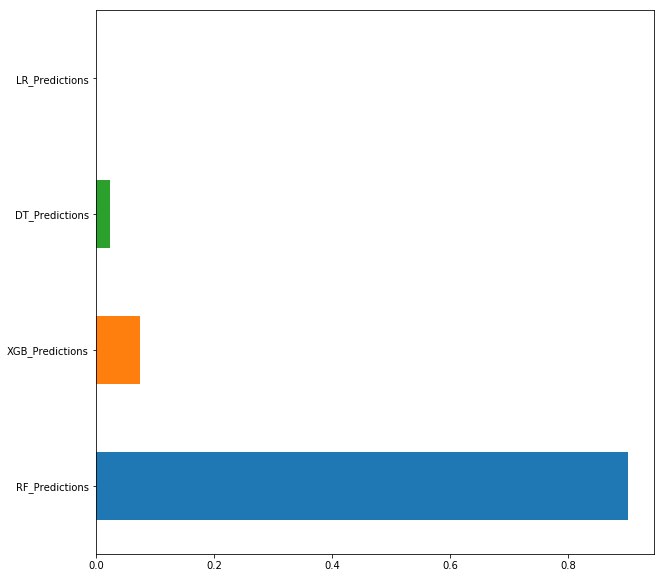

In [78]:
 #Get Feature Importance from the classifier
feature_importance = clf_RF_final.feature_importances_
print (clf_RF_final.feature_importances_)
feat_importances = pd.Series(clf_RF_final.feature_importances_, index=x_train_final.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [79]:
# use the model to make predictions with the test data
y_pred_RF_Train_final = clf_RF_final.predict(x_train_final)
y_pred_RF_Test_final = clf_RF_final.predict(x_test_final)

In [80]:
y_pred_RF_Train_final = pd.DataFrame(y_pred_RF_Train_final)
y_pred_RF_Test_final =pd.DataFrame({'predict':y_pred_RF_Test_final})

In [81]:
print(classification_report(y_test,y_pred_RF_Test) )

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7451
         1.0       0.92      0.24      0.39       619

   micro avg       0.94      0.94      0.94      8070
   macro avg       0.93      0.62      0.68      8070
weighted avg       0.94      0.94      0.92      8070



In [82]:
Y_testd=pd.DataFrame(y_test)

In [83]:
confusion_fianl=confusion_matrix (y_test,y_pred_RF_Test)

In [84]:
confusion_fianl.transpose()

array([[7437,  468],
       [  14,  151]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

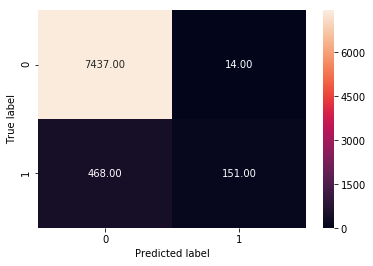

In [85]:
sns.heatmap(confusion_fianl, annot=True,fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')